# movie-industry

* Data source - Kaggles
* Date :- 08/02/2022
* Editor 1:- Sanjay Bhatt

In [40]:
# Importing required library and dataset

!pip install jovian --upgrade --quiet
#import libraries
import jovian
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusting the configurations of charts that we'll create

# reading the data

df = pd.read_csv('movies.csv')

In [50]:
# Taking a look at the data

df.head(4)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400,927000.000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.000,46998772.000,Warner Bros.,146.000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800,65000.000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.000,58853106.000,Columbia Pictures,104.000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700,1200000.000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.000,538375067.000,Lucasfilm,124.000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700,221000.000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.000,83453539.000,Paramount Pictures,88.000


In [3]:
df.shape

(7668, 15)

In [4]:
# Looking at the missing data

df.isnull().mean()

name        0.000000
rating      0.010042
genre       0.000000
year        0.000000
released    0.000261
score       0.000391
votes       0.000391
director    0.000000
writer      0.000391
star        0.000130
country     0.000391
budget      0.283125
gross       0.024648
company     0.002217
runtime     0.000522
dtype: float64

In [42]:
#dropping the null data

df1 = df.dropna()

In [6]:
# datatypes 

df1.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [56]:
#change datatype of columns
df1["budget"] = df1['budget'].astype(np.int64)
df1["gross"] = df1['gross'].astype(np.int64)

/tmp/ipykernel_80/1724307750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["budget"] = df1['budget'].astype(np.int64)
/tmp/ipykernel_80/1724307750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["gross"] = df1['gross'].astype(np.int64)


In [57]:
df1.sample(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
861,9½ Weeks,R,Drama,1986,"February 21, 1986 (United States)",6.000,39000.000,Adrian Lyne,Elizabeth McNeill,Mickey Rourke,United States,17000000,6735922,Producers Sales Organization (PSO),117.000
6783,Mortdecai,R,Action,2015,"January 23, 2015 (United States)",5.500,69000.000,David Koepp,Eric Aronson,Johnny Depp,United Kingdom,60000000,47275717,MWM Studios,107.000
6752,Child 44,R,Crime,2015,"April 17, 2015 (United Kingdom)",6.500,68000.000,Daniel Espinosa,Richard Price,Tom Hardy,Czech Republic,50000000,12951093,Summit Entertainment,137.000


In [9]:
pd.set_option('display.max_rows', None)

In [10]:
df1 = df1.sort_values("gross",inplace = False, ascending = False)

In [11]:
df1.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3469,Lake Placid,R,Action,1999,"July 16, 1999 (United States)",5.7,56000.0,Steve Miner,David E. Kelley,Bridget Fonda,United States,35000000,56870414,Fox 2000 Pictures,82.0
4674,The Longest Yard,PG-13,Comedy,2005,"May 27, 2005 (United States)",6.4,167000.0,Peter Segal,Albert S. Ruddy,Adam Sandler,United States,82000000,191466556,Paramount Pictures,113.0
7326,Mid90s,R,Comedy,2018,"October 26, 2018 (United States)",7.4,54000.0,Jonah Hill,Jonah Hill,Sunny Suljic,United States,10000000,9303022,A24,85.0
3872,Planet of the Apes,PG-13,Action,2001,"July 27, 2001 (United States)",5.7,213000.0,Tim Burton,Pierre Boulle,Mark Wahlberg,United States,100000000,362211740,Twentieth Century Fox,119.0
5046,Gone Baby Gone,R,Crime,2007,"October 19, 2007 (United States)",7.6,258000.0,Ben Affleck,Ben Affleck,Morgan Freeman,United States,19000000,34612443,Miramax,114.0


In [13]:
# Changing the gross value from scientific to normal

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [51]:
df1.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400,927000.000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.000,46998772.000,Warner Bros.,146.000
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800,65000.000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.000,58853106.000,Columbia Pictures,104.000
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700,1200000.000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.000,538375067.000,Lucasfilm,124.000
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700,221000.000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.000,83453539.000,Paramount Pictures,88.000
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300,108000.000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.000,39846344.000,Orion Pictures,98.000


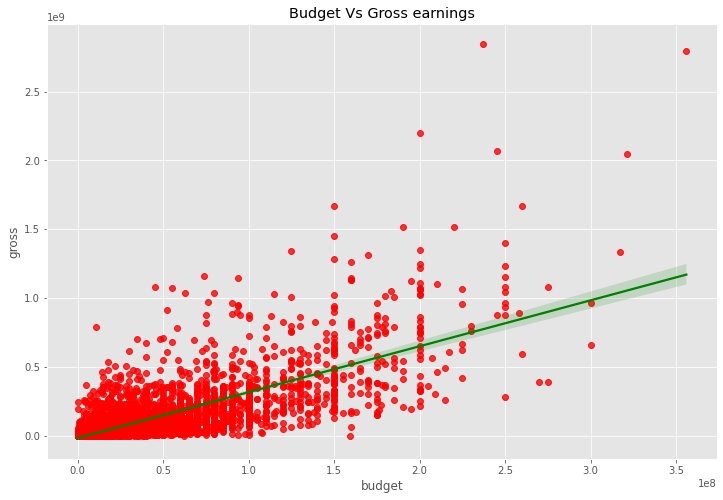

In [17]:
# plot the budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data = df1, scatter_kws = {"color": "red"},line_kws = {"color":"green"})
plt.title('Budget Vs Gross earnings');

In [44]:
# looking at correlation

df1.corr()

,year,score,votes,budget,gross,runtime
year,1.000,0.056,0.206,0.328,0.274,0.075
score,0.056,1.000,0.474,0.072,0.223,0.414
votes,0.206,0.474,1.000,0.440,0.615,0.352
budget,0.328,0.072,0.440,1.000,0.740,0.319
gross,0.274,0.223,0.615,0.740,1.000,0.276
runtime,0.075,0.414,0.352,0.319,0.276,1.000


In [ ]:
# High correlation between budget and gross

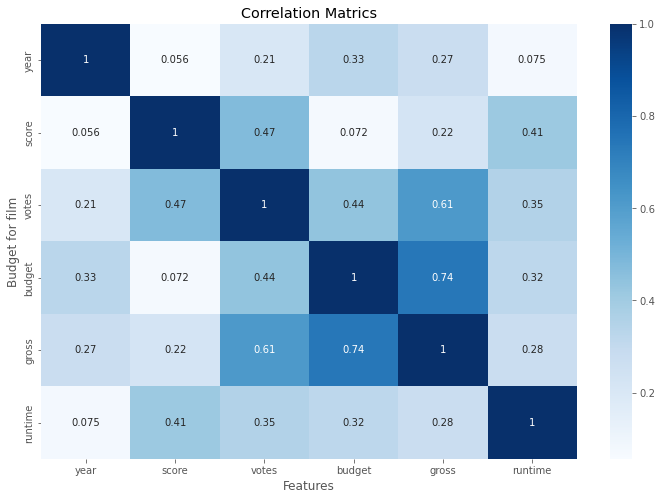

In [45]:
correlation = df1.corr()

sns.heatmap(correlation, annot = True, cmap = 'Blues')
plt.title('Correlation Matrics')
plt.xlabel('Features')
plt.ylabel('Budget for film');

In [53]:
# Giving numeric value to company for further analysis

dfrm_numeric = df1.copy()

for column in dfrm_numeric.columns:
    if(dfrm_numeric[column].dtypes == 'object'):
        dfrm_numeric[column]=dfrm_numeric[column].astype('category')
        dfrm_numeric[column]=dfrm_numeric[column].cat.codes

dfrm_numeric.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.400,927000.000,1795,2832,699,46,19000000.000,46998772.000,1426,146.000
1,3929,6,1,1980,1127,5.800,65000.000,1578,1158,214,47,4500000.000,58853106.000,452,104.000
2,3641,4,0,1980,1359,8.700,1200000.000,757,1818,1157,47,18000000.000,538375067.000,945,124.000
3,204,4,4,1980,1127,7.700,221000.000,889,1413,1474,47,3500000.000,83453539.000,1108,88.000
4,732,6,4,1980,1170,7.300,108000.000,719,351,271,47,6000000.000,39846344.000,1083,98.000


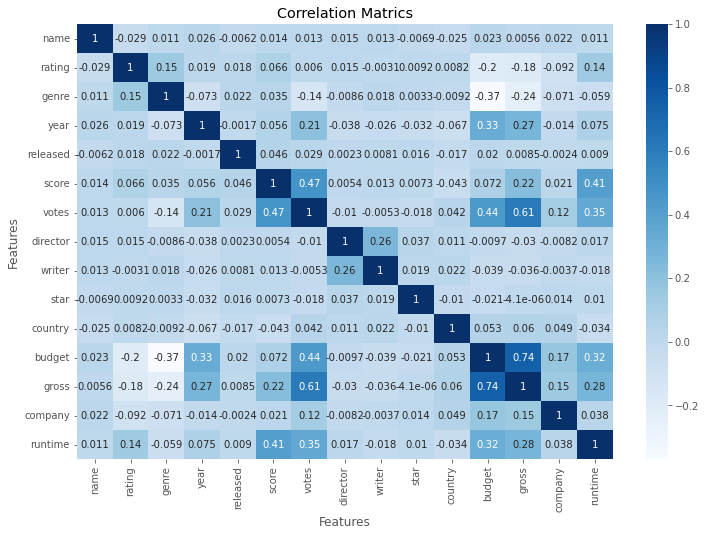

In [49]:
correlation =dfrm_numeric.corr()

sns.heatmap(correlation, annot = True, cmap = 'Blues')
plt.title('Correlation Matrics')
plt.xlabel('Features')
plt.ylabel('Features');

* There is good correlation between votes and budget also 
* Among all the other features the Budget and gross income are highly correlated

In [ ]:
jovian.commit(project = 'movie_industry')

<IPython.core.display.Javascript object>